<a href="https://colab.research.google.com/github/raviku9273/my_pr/blob/master/HR_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd    # perform CSV file I/O  
import numpy as np     #  use in fast computaion of array (linear algebra)

#loading dataset from csv files
train_dataset = pd.read_csv('aug_train.csv')
test_dataset = pd.read_csv('aug_test.csv')

train_dataset.tail(10) 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [2]:
test_dataset.tail(5)     # tail() shows test dataset from downward

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84
2128,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11


In [3]:
train_dataset.info()         # gives information about colulmn attribute wether null/non_null and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


Data description about each column attributes 
* enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change



### feature engineering
Thre are 5 Ordinal variables present
* experience
* education_level
* company_type
* last_new_job
* company_size

In [5]:
# we have to perform feature engineering in both train and test dataset so we can comnbine the dataset and later we can split train, test after data preprocesing
# we will have to add fake target attribute in test dataset for combine with train dataset for easy separation

test_dataset['target'] = -1  # later we have to remove fake target variable from test

# suggestion - always reset indices whenever join or split dataset is done

df_combine = pd.concat([train_dataset, test_dataset], axis = 0).reset_index(drop = True)

df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

***Use hot encoding for categorical variable***

In [6]:
# label encoding can be done by LabelEncoder present in Scikit-Learn 
# firstly handle missing values

from sklearn.preprocessing import LabelEncoder
df = df_combine.copy()
df['education_level'].value_counts()

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

In [7]:
df.loc[:, 'education_level'] =  df['education_level'].fillna("NONE")
label_encoder = LabelEncoder()
df.loc[:, 'education_level'] = label_encoder.fit_transform(df['education_level'].values) 
df['education_level'].value_counts()

0    12867
2     4857
1     2239
3      512
4      468
5      344
Name: education_level, dtype: int64

In [8]:
# Using dictionary for mapping ordinal feature

experience_map = {
    '<1' : 0, '1' : 1, '2' : 2, '3' : 3, '4': 4, '5':5, '6' : 6, '7' : 7, '8': 8, '9': 9, '10' : 10, '11' : 11, '12' : 12, '13': 13,
    '14': 14, '15' : 15, '16' : 16, '17' : 17, '18' : 18, '19' : 19, '20' : 20, '>20' : 21
    }

gender_map = {
    ' Other' : 0, 'Male' : 1,  'Female' : 2
}

relevent_experience_map = {
    'No relevent experience' : 0,
    'Has relevent experience' : 1
}

enrolled_university_map = {
    'no_enrollment' : 0, 'Full time course' : 1, 'Part time course' : 2
}

education_level_map ={
    'Primary School' : 0, 'High School' : 1, 'Graduate' : 2, 'Master' : 3, 'Phd' : 4
}

major_map ={
    'STEM' : 1, 'Buisness Degree' : 2,
    'Arts' : 3, 'Humanities' : 4,
    'No Major' : 5, 'Other' : 0
}

company_type_map = {
    'Other' : 0, 
    'Funded Startup' :  1, 
    'Early Stage Startup' : 2, 
    'Pvt Ltd' : 3,
    'Public Sector' : 4, 
    'NGO' : 5
}

company_size_map = {
    '<10' : 0, '10/49' : 1, '100-500' : 2, 
    '1000-4999' : 3, '10000+' : 4, '50-99' : 5, 
    '500-999' : 6, '5000-9999' : 7
}
    
last_new_job_map = {
    'never' : 0, '1' : 1, '2' : 2, '3' : 3, '4' : 4, '>4' : 5
}

In [9]:
# Transforming Categorical columns into numarical columns

df_combine.loc[:,'education_level'] = df_combine['education_level'].map(education_level_map)
df_combine.loc[:,'company_size'] = df_combine['company_size'].map(company_size_map)
df_combine.loc[:,'company_type'] = df_combine['company_type'].map(company_type_map)
df_combine.loc[:,'last_new_job'] = df_combine['last_new_job'].map(last_new_job_map)
df_combine.loc[:,'major_discipline'] = df_combine['major_discipline'].map(major_map)
df_combine.loc[:,'enrolled_university'] = df_combine['enrolled_university'].map(enrolled_university_map)
df_combine.loc[:,'relevent_experience'] = df_combine['relevent_experience'].map(relevent_experience_map)
df_combine.loc[:,'gender'] = df_combine['gender'].map(gender_map)
df_combine.loc[:,'experience'] = df_combine['experience'].map(experience_map)

# encoding city feature using label encoder
label_enc = LabelEncoder()

df_combine.loc[:,'city'] = label_enc.fit_transform(df_combine.loc[:,'city']) 

In [10]:
df_combine.head(5) # combined dataframe test and train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1.0,1,0.0,2.0,1.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,1.0,0,0.0,2.0,1.0,15.0,5.0,3.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,1.0,2.0,1.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,NaN,0.0,NaN,3.0,0.0,52,1.0
4,666,50,0.767,1.0,1,0.0,NaN,1.0,21.0,5.0,1.0,4.0,8,0.0


In [11]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  int64  
 2   city_development_index  21287 non-null  float64
 3   gender                  16056 non-null  float64
 4   relevent_experience     21287 non-null  int64  
 5   enrolled_university     20870 non-null  float64
 6   education_level         15918 non-null  float64
 7   major_discipline        17798 non-null  float64
 8   experience              21217 non-null  float64
 9   company_size            14727 non-null  float64
 10  company_type            14513 non-null  float64
 11  last_new_job            20824 non-null  float64
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(10), int64(4)
memory usage:

**Handling Missing Data**

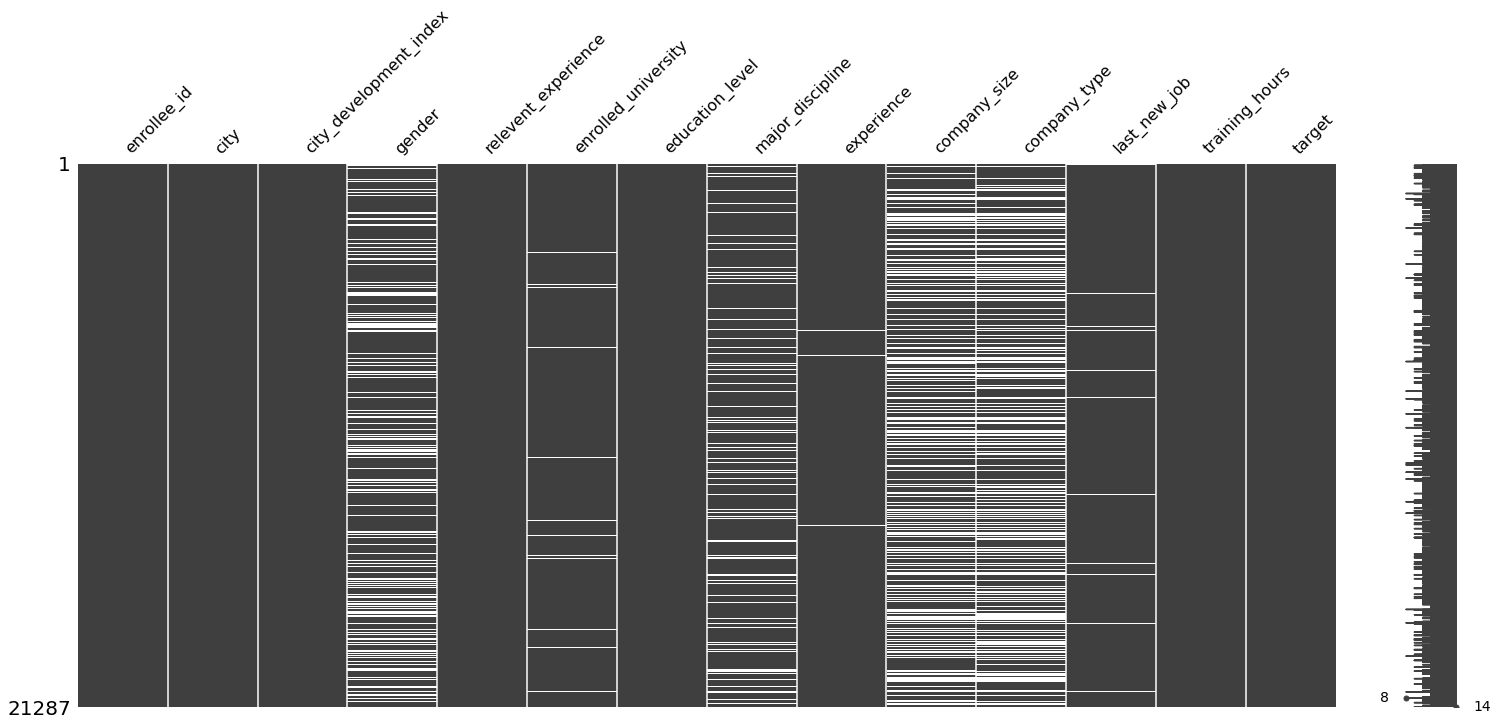

<Figure size 1080x648 with 0 Axes>

In [12]:
import missingno as mns
import matplotlib.pyplot as plot

mns.matrix(df)
plot.figure(figsize = (15,9))
plot.show()

bar graph shows missing data in each column attribute

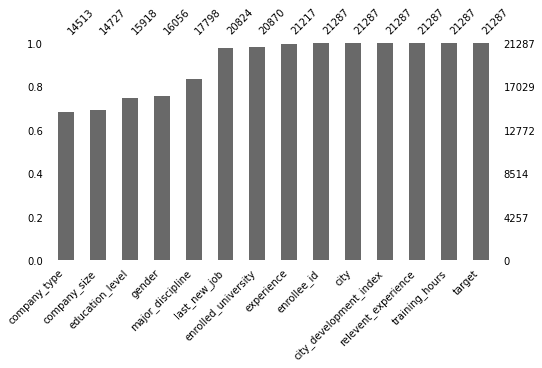

In [13]:
 mns.bar(df_combine, sort = 'ascending', figsize=(8,4), fontsize=10) # arrange in ascending order

arranging in ascending order of missing data in each column attribute

In [14]:
# number of null values present in every column in train and test combine dataset

for col in df_combine.columns:
    null_val = df_combine[col].isnull().sum()
    null_prec = (null_val * 100) / df_combine.shape[0]
    print('> %s , Missing: %d (%.1f%%)' % (col, null_val, null_prec))

> enrollee_id , Missing: 0 (0.0%)
> city , Missing: 0 (0.0%)
> city_development_index , Missing: 0 (0.0%)
> gender , Missing: 5231 (24.6%)
> relevent_experience , Missing: 0 (0.0%)
> enrolled_university , Missing: 417 (2.0%)
> education_level , Missing: 5369 (25.2%)
> major_discipline , Missing: 3489 (16.4%)
> experience , Missing: 70 (0.3%)
> company_size , Missing: 6560 (30.8%)
> company_type , Missing: 6774 (31.8%)
> last_new_job , Missing: 463 (2.2%)
> training_hours , Missing: 0 (0.0%)
> target , Missing: 0 (0.0%)


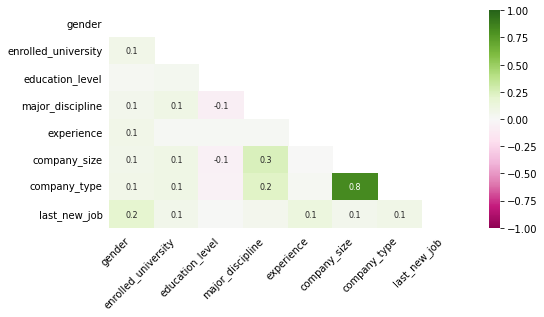

In [15]:
mns.heatmap(df_combine, cmap="PiYG", figsize=(8,4), fontsize=10);

company size and company type attribute highly positive co-related than other attributes

In [16]:
# Use nearest neighbour approch for replacing missing values
# Algorithms uses nearest Imputation for completing missing values using k-Nearest Neighbors.
#Each sample's missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. 
#Two samples are close if the features that neither is missing are close
from sklearn.impute import KNNImputer        
df_combine1 = df_combine.copy()
knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_combine1))
df_combine1 = pd.DataFrame(X, columns = df_combine1.columns)
df_combine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  float64
 1   city                    21287 non-null  float64
 2   city_development_index  21287 non-null  float64
 3   gender                  21287 non-null  float64
 4   relevent_experience     21287 non-null  float64
 5   enrolled_university     21287 non-null  float64
 6   education_level         21287 non-null  float64
 7   major_discipline        21287 non-null  float64
 8   experience              21287 non-null  float64
 9   company_size            21287 non-null  float64
 10  company_type            21287 non-null  float64
 11  last_new_job            21287 non-null  float64
 12  training_hours          21287 non-null  float64
 13  target                  21287 non-null  float64
dtypes: float64(14)
memory usage: 2.3 MB


In [17]:
df_combine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  float64
 1   city                    21287 non-null  float64
 2   city_development_index  21287 non-null  float64
 3   gender                  21287 non-null  float64
 4   relevent_experience     21287 non-null  float64
 5   enrolled_university     21287 non-null  float64
 6   education_level         21287 non-null  float64
 7   major_discipline        21287 non-null  float64
 8   experience              21287 non-null  float64
 9   company_size            21287 non-null  float64
 10  company_type            21287 non-null  float64
 11  last_new_job            21287 non-null  float64
 12  training_hours          21287 non-null  float64
 13  target                  21287 non-null  float64
dtypes: float64(14)
memory usage: 2.3 MB


**Plotting kernel density estimate plot just to know distribution of city_development_index feature before and after imputation.**

*city_development_index values were in continues form before imputation but after imputation now they are in discrete form beacuse rounding values after imputation cause of this city_development_index values converted into discrete form*

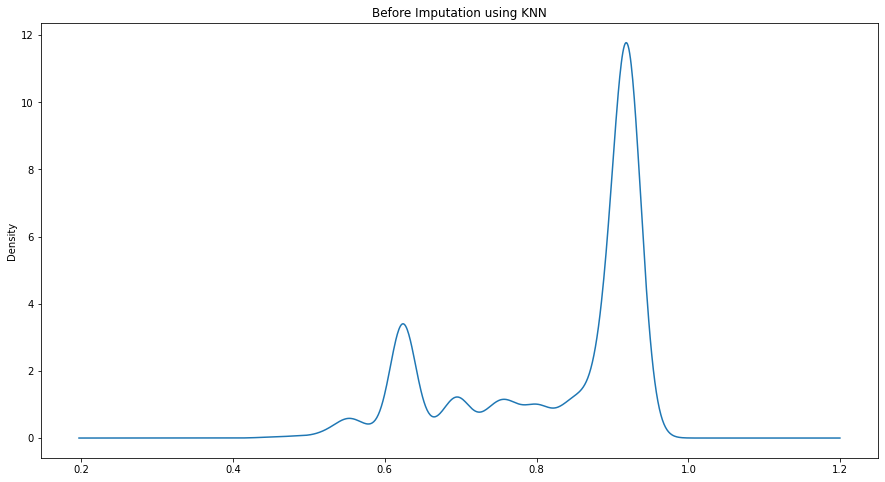

In [18]:
import matplotlib.pyplot as plot
plot.figure(figsize = (15,8))
plot.title('Before Imputation using KNN')
df_combine['city_development_index'].plot(kind = 'kde')
plot.show()

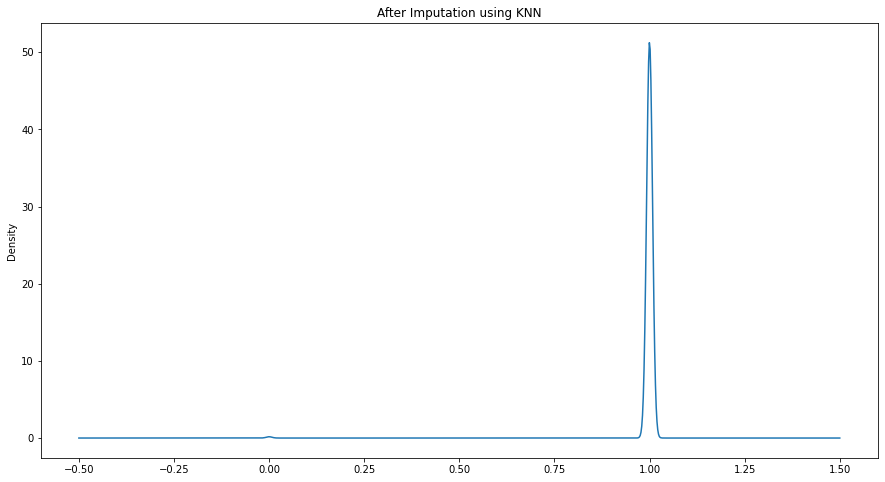

In [19]:
plot.figure(figsize = (15,8))
plot.title('After Imputation using KNN')
df_combine1['city_development_index'].plot(kind = 'kde')
plot.show()

In [20]:
# missing columns
missing_columns = df_combine.columns[df_combine.isna().any()].tolist()
missing_columns

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [21]:
#dataset having features with missing values
data_missing = df_combine[['enrollee_id'] + missing_columns]

#dataset having features without missing values
data_non_missing = df_combine.drop(missing_columns, axis = 1)

In [22]:
#k-Nearest Neighbour Imputation

knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(data_missing))
#Rounding them because these are categorical features

data_missing = pd.DataFrame(X, columns = data_missing.columns)

In [23]:
#now joining both test and train dataset

df_combine2 = pd.merge(data_missing, data_non_missing, on = 'enrollee_id')

In [24]:
train_data = df_combine2[df_combine2['target'] != -1].reset_index(drop = True)
test_data = df_combine2[df_combine2['target'] == -1].reset_index(drop = True)

X = train_data.drop(['enrollee_id', 'target'], axis = 1)
Y = train_data['target']

# drop fake target feature from test data
test_data = test_data.drop('target', axis = 1)     # axis=1 removes column wise 

Metrices

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


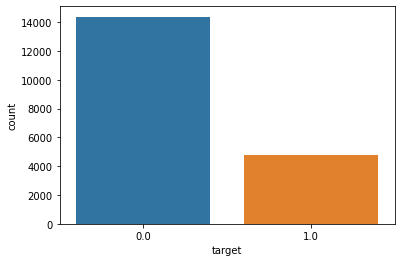

In [25]:
import seaborn as sns
sns.countplot(train_data['target'])

Here the target is skewed, therefore best metric for this binary classification problem would be Area Under the ROC Curve (AUC)

**Model Building**

In [26]:
# import libraries for model building
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

**Extreme Gradient Boosting (XGBoost) **

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2 ,random_state = 42)

classifier = XGBClassifier()

classifier.fit(X_train, y_train)

y_train_prediction = classifier.predict_proba(X_train)
y_train_prediction_position = y_train_prediction[:,1]

y_value_prediction = classifier.predict_proba(X_val)
y_val_prediction_position = y_value_prediction[:,1]

auc_train = roc_auc_score(y_train, y_train_prediction_position)
auc_test = roc_auc_score(y_val, y_val_prediction_position)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

fpr, tpr, _ = roc_curve(y_val, y_val_prediction_position)

Train AUC Score 0.7927488089981377
Test AUC Score 0.7725902340102707


*model is overfitting the data, we can do various things to resolve this problem like we can increase data set size in balanced manner*

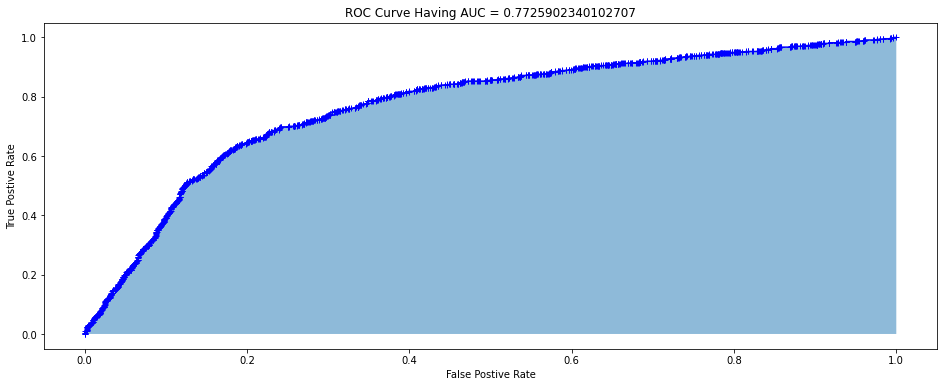

In [157]:
def plot_auc_curve(fpr, tpr, auc):
    plot.figure(figsize = (16,6))
    plot.plot(fpr,tpr,'b+',linestyle = '-')
    plot.fill_between(fpr, tpr, alpha = 0.5)
    plot.ylabel('True Postive Rate')
    plot.xlabel('False Postive Rate')
    plot.title(f'ROC Curve Having AUC = {auc}')

plot_auc_curve(fpr, tpr, auc_test)

**Learning Curve**

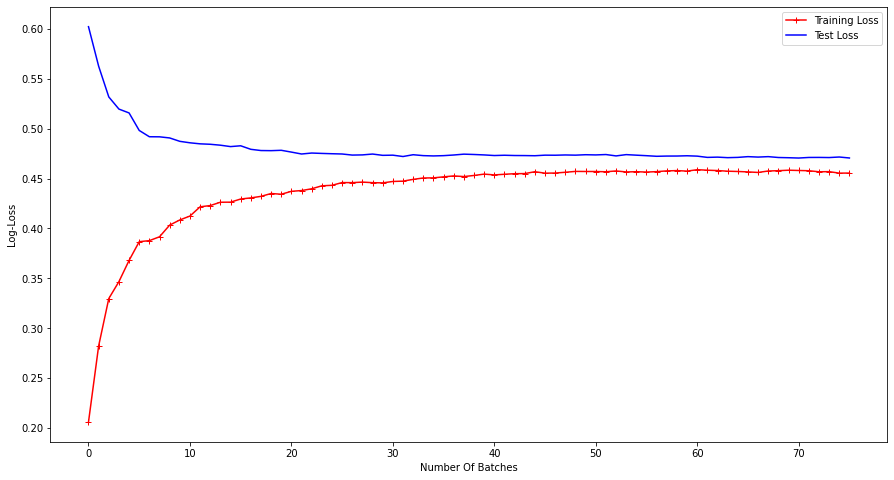

In [27]:
# funtion to plot learning curves

def plot_learning_cuve(model, X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)
    train_loss, test_loss = [], []
    
    for m in range(200,len(x_train),200):
        
        model.fit(x_train.iloc[:m,:], y_train[:m])
        y_train_prob_pred = model.predict_proba(x_train.iloc[:m,:])
        train_loss.append(log_loss(y_train[:m], y_train_prob_pred))

        y_test_prob_pred = model.predict_proba(x_test)
        test_loss.append(log_loss(y_test, y_test_prob_pred))
        
    plot.figure(figsize = (15,8))
    plot.plot(train_loss, 'r-+', label = 'Training Loss')
    plot.plot(test_loss, 'b-', label = 'Test Loss')
    plot.xlabel('Number Of Batches')
    plot.ylabel('Log-Loss')
    plot.legend(loc = 'best')

    plot.show()

plot_learning_cuve(XGBClassifier(), X, Y)

this shows us model is overfitting, hence we have to increase data, its high variance problem

Oversampling using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


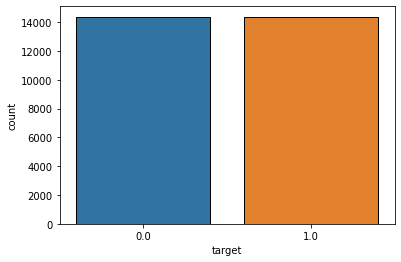

In [29]:
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,Y)

sns.countplot(Y_smote, edgecolor = 'black')

In [30]:
print(X_smote.shape)

(28762, 12)


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, Y_smote, test_size = 0.2 ,random_state = 42)

classifier = XGBClassifier()

classifier.fit(X_train, y_train)

y_train_pred = classifier.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = classifier.predict_proba(X_val)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(y_train, y_train_pred_pos)
auc_test = roc_auc_score(y_val, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

Train AUC Score 0.9172130178328465
Test AUC Score 0.9129631899052626


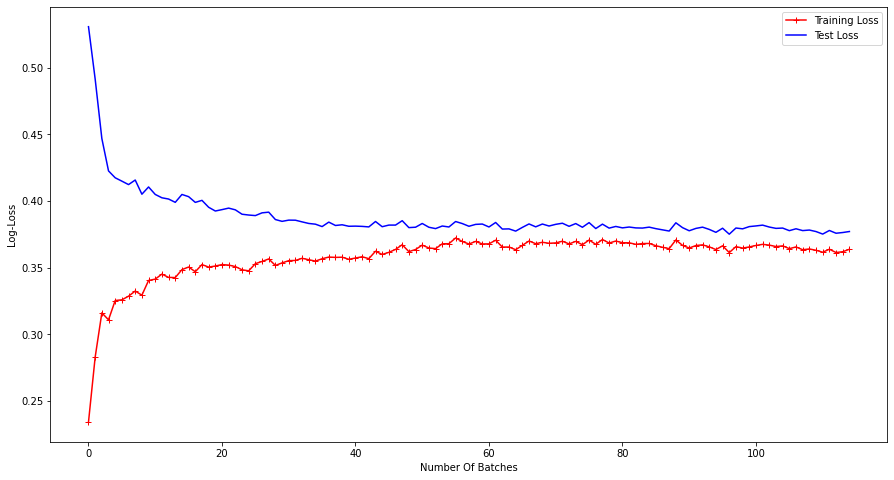

In [32]:
plot_learning_cuve(XGBClassifier(), X_smote, Y_smote)